In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import pandas as pd

train = pd.read_csv("../data/train_without_error.csv")
test = pd.read_csv("../data/test_without_error.csv")

train.shape, test.shape

((2869, 15), (1008, 14))

### 컬럼명 변경

In [17]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', 
                 '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', 
                 '임대료', '지하철', '버스', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', 
                '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', 
                '임대료', '지하철', '버스', '단지내주차면수']

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2869 non-null   object 
 1   총세대수      2869 non-null   int64  
 2   임대건물구분    2869 non-null   object 
 3   지역        2869 non-null   object 
 4   공급유형      2869 non-null   object 
 5   전용면적      2869 non-null   float64
 6   전용면적별세대수  2869 non-null   int64  
 7   공가수       2869 non-null   float64
 8   자격유형      2869 non-null   object 
 9   임대보증금     2300 non-null   object 
 10  임대료       2300 non-null   object 
 11  지하철       2662 non-null   float64
 12  버스        2869 non-null   float64
 13  단지내주차면수   2869 non-null   float64
 14  등록차량수     2869 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 336.3+ KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      1008 non-null   object 
 1   총세대수      1008 non-null   int64  
 2   임대건물구분    1008 non-null   object 
 3   지역        1008 non-null   object 
 4   공급유형      1008 non-null   object 
 5   전용면적      1008 non-null   float64
 6   전용면적별세대수  1008 non-null   int64  
 7   공가수       1008 non-null   float64
 8   자격유형      1006 non-null   object 
 9   임대보증금     828 non-null    object 
 10  임대료       828 non-null    object 
 11  지하철       970 non-null    float64
 12  버스        1008 non-null   float64
 13  단지내주차면수   1008 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 110.4+ KB


### 결측치 확인

<AxesSubplot:>

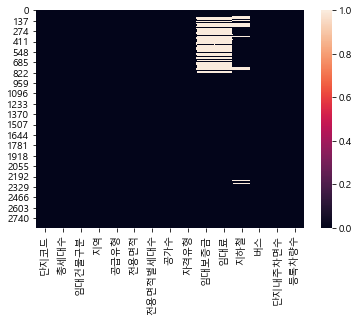

In [19]:
%matplotlib inline
sns.heatmap(train.isnull())

<AxesSubplot:>

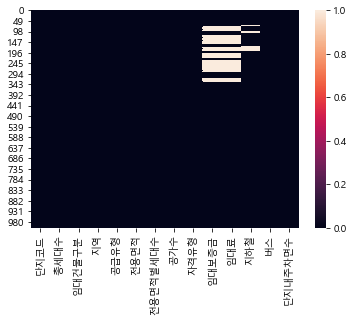

In [32]:
sns.heatmap(test.isnull())

In [40]:
print('train 결측치: \n\n',train.isna().sum())
print('\ntest 결측치: \n\n', test.isnull().sum())

train 결측치: 

 단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         207
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

test 결측치: 

 단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       180
임대료         180
지하철          38
버스            0
단지내주차면수       0
dtype: int64


### 결측치 처리 1. 자격유형

In [42]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
196,C2411,961,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [43]:
grouped = test.groupby(['단지코드', '임대건물구분', '지역'])
group1 = grouped.get_group(('C2411', '아파트', '경상남도'))
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
193,C2411,961,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,961,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,961,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,961,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
197,C2411,961,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [44]:
test.loc[196, '자격유형'] = 'A'

In [45]:
group2 = grouped.get_group(('C2253', '아파트', '강원도'))
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [46]:
test.loc[258,'자격유형'] = 'C'

In [47]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수


### test 자격유형 결측치 완료

In [48]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스', '단지내주차면수', '등록차량수'],
      dtype='object')